In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1lORbh70-sTXvY48ARifexxLsYepDcHSx',
                                    dest_path='./navdata_input_30.npy',
                                    unzip=False)

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='10WwaIDmBo2cfdHJz4O0aABN0mIbF8ByH',
                                    dest_path='./navdata_output_30.npy',
                                    unzip=False)

In [ ]:
import numpy as np
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from torch import autograd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import math
import random

In [ ]:
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value)  
    torch.manual_seed(seed_value)  
    random.seed(seed_value)
    if use_cuda:
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
random_seed(42, True)

In [ ]:
class SyntheticNavigationDataset(Dataset):

  #probably not a good idea to load 700 mb of data directly to RAM
  #current dataset has 33000 maps ,  the paper uses 100000 

  def __init__(self,x_file,y_file,n):
    self.x_list = []
    self.y_list = []
    with open(x_file,'rb') as fx, open(y_file,'rb') as fy:
      for i in range(n):
        self.x_list.append(np.load(fx))
        self.y_list.append(np.load(fy))
  
  def __len__(self):
    return len(self.x_list)

  def __getitem__(self,idx):
    x_tensor = torch.from_numpy(self.x_list[idx].astype(np.float32))
    y_tensor = torch.from_numpy(self.y_list[idx].astype(np.float32))
    sample = {'x':x_tensor,'y':y_tensor}

    return sample   

In [ ]:
nav_dataset = SyntheticNavigationDataset(x_file = './navdata_input_30.npy', y_file = './navdata_output_30.npy',n = 33000)
sample = nav_dataset[10]
print(sample['x'])


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 1.,  ..., 1., 1., 0.],
         [0., 1., 1.,  ..., 1., 1., 0.],
         [0., 1., 1.,  ..., 1., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [ ]:
sample = nav_dataset[10]
print(sample['y'])

tensor([[38., 37., 36., 35., 34., 33., 32., 31., 32., 33., 34., 35., 34., 33.,
         32., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
         44., 45.],
        [37., 36., 35., 34., 33., 32., 31., 30., -1., -1., -1., -1., -1., -1.,
         -1., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
         43., 44.],
        [36., 35., 34., 33., 32., 31., 30., 29., -1., -1., -1., -1., -1., -1.,
         28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
         42., 43.],
        [35., 34., 33., 32., 31., 30., 29., 28., -1., -1., -1., -1., -1., -1.,
         27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
         41., 42.],
        [34., 33., 32., 31., 30., 29., 28., 27., -1., -1., -1., -1., -1., -1.,
         26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
         40., 41.],
        [33., 32., 31., 30., 29., 28., 27., 26., -1., -1., -1., -1., -1., -1.,
         25., 26., 27., 28., 29

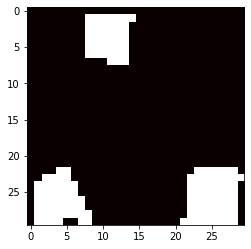

In [ ]:
plt.imshow(sample['x'][0], cmap='hot', interpolation='nearest')
plt.show()

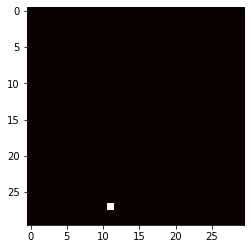

In [ ]:
plt.imshow(sample['x'][1], cmap='hot', interpolation='nearest')
plt.show()

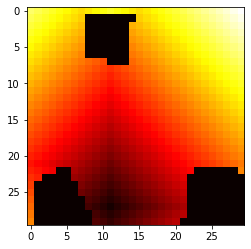

In [ ]:
plt.imshow(sample['y'], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
# class NeuralNetwork1(nn.Module):
  
#   def __init__(self):
#     super().__init__()
#     self.conv1 = nn.Conv2d(2,8,1)
#     self.conv2 = nn.Conv2d(8,64,1) #embedding size d = 64 apparently ? not sure how the two conv layers are actually connected
#     self.flatten = nn.Flatten(start_dim = 2)

#   def forward(self,x):
#     x = F.relu(self.conv1(x))
#     x = F.relu(self.conv2(x))
#     x = self.flatten(x)

#     #positional encoding 
#     #d = 64 , M^2 = 900
#     #dry testing with fixed values
    
#     P = np.random.rand(64,900)

#     for j in range(900):
#       for i in range(32):
#         P[2*i,j] = math.sin(j/(900**(2*i/64)))
#       for i in range(32):
#         P[2*i+1,j] = math.cos(j/(900**(2*i/64)))

#     p = torch.from_numpy(P)
#     p = p.to('cuda')
#     x = x + p
#     #I guess this handles the positional encoding part

#     return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [ ]:
# model = NeuralNetwork1().to(device)
# print(model)

In [ ]:
# X = torch.rand(1,2,30,30, device=device)
# tes1 = model(X)
# print(tes1.shape)

In [ ]:
class NeuralNetwork2(nn.Module):
  
  def __init__(self):
    super().__init__()
    # LeNet()
    self.conv1 = nn.Conv2d(in_channels = 2,out_channels = 8, kernel_size = 1)
    # self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(8,64,1) #embedding size d = 64 apparently ? not sure how the two conv layers are actually connected
    self.flatten = nn.Flatten(start_dim = 2)

    # Positional Encoding
    self.P = np.zeros((64,900))
    for j in range(900):
      for i in range(1,33):
        self.P[2*i-2,j] = math.sin(j/(900**(2*i/64)))
      for i in range(1,33):
        self.P[2*i-1,j] = math.cos(j/(900**(2*i/64)))
    self.P = torch.from_numpy(self.P.astype(np.float32))
    self.P = self.P.to('cuda')
    print(f'P nantest = {torch.isnan(self.P).any()}')
    # Encoder
    self.transformerlayer1 = nn.TransformerEncoderLayer(d_model=900, nhead=9, dim_feedforward=512, dropout=0, layer_norm_eps=1e-05, batch_first=False, norm_first=False, device=None, dtype=None)
    self.transformerlayer2 = nn.TransformerEncoderLayer(d_model=900, nhead=9, dim_feedforward=512, dropout=0, layer_norm_eps=1e-05, batch_first=False, norm_first=False, device=None, dtype=None)
    self.transformerlayer3 = nn.TransformerEncoderLayer(d_model=900, nhead=9, dim_feedforward=512, dropout=0, layer_norm_eps=1e-05, batch_first=False, norm_first=False, device=None, dtype=None)
    self.transformerlayer4 = nn.TransformerEncoderLayer(d_model=900, nhead=9, dim_feedforward=512, dropout=0, layer_norm_eps=1e-05, batch_first=False, norm_first=False, device=None, dtype=None)
    self.transformerlayer5 = nn.TransformerEncoderLayer(d_model=900, nhead=9, dim_feedforward=512, dropout=0, layer_norm_eps=1e-05, batch_first=False, norm_first=False, device=None, dtype=None)

    # Decoder
    self.fc1 = nn.Linear(64,1)
    # self.fc1 = nn.Conv1d(in_channels = 64,out_channels=1,kernel_size=1)

  def forward(self,x):
    # print(f'x input nantest = {torch.isnan(x).any()}')
    # print(f'x before conv = {x}')    
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    # print(f'x after conv = {x}')  
    # print(f'x conv nantest = {torch.isnan(x).any()}')
    x = self.flatten(x)

    x = (x + self.P)
    # print(f'x + positional encoding nantest = {torch.isnan(x).any()}')
    x = self.transformerlayer1(x)
    x = self.transformerlayer2(x)
    x = self.transformerlayer3(x)
    x = self.transformerlayer4(x)
    x = self.transformerlayer5(x)
    # print(f'x transformer nantest = {torch.isnan(x).any()}')
    x = x.permute(0,2,1)
    # x = self.fc1(x)
    x = x.permute(0,2,1)

    # print(f'x fc1 nantest = {torch.isnan(x).any()}')
    return x

In [ ]:
model = NeuralNetwork2().to(device)
print(model)

RuntimeError: ignored

In [ ]:
X = torch.rand(1,2,30,30, device=device)
tes1 = model(X)
print(tes1.shape)

In [ ]:
tes1 = torch.reshape(tes1,(30,30))

In [ ]:
print(tes1.shape)

In [ ]:
tes1 = tes1.to('cpu').detach().numpy()

In [ ]:
plt.imshow(tes1, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(nav_dataset, batch_size=20, shuffle=True)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    # with autograd.detect_anomaly():
    for batch, sample in enumerate(dataloader):
        # Compute prediction and loss
        # sample = sample.to(device)
        pred = model(sample['x'].to(device))
        sample['y'] = sample['y'].to(device)
        # print(pred.shape)
        # print(sample['y'].shape)
        # break
        loss = loss_fn(torch.reshape(pred,(-1,30,30)), sample['y'])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for sample in dataloader:
            pred = model(sample['x'].to(device))
            sample['y'] = sample['y'].to(device)
            test_loss += loss_fn(torch.reshape(pred,(-1,30,30)), sample['y']).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=1, gamma=0.9)
epochs = 40
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    # test_loop(train_dataloader, model, loss_fn)
    scheduler.step()
print("Done!")

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
model.eval()

In [ ]:
sample = nav_dataset[10]
sample['x'] = torch.reshape(sample['x'],(1,2,30,30))
output = model(sample['x'].to(device))
output = torch.reshape(output,(30,30))
output = output.to('cpu').detach().numpy()

plt.imshow(output, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
plt.imshow(sample['y'], cmap='hot', interpolation='nearest')
plt.show()